# Analyzing COVID-19 in the United States and Its Impact

Throughout the final unit we have explored COVID-19 and its spread throughout the world. 

The visualizations in this notebook will focus on and explore its impact on the United States.

In [1]:
#Import all libraries you may need in this cell:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

## 1 - Finding the COVID-19 numbers per state.

In [28]:
#4 lists of data compiled for your convenience

#List of states sorted in alphabetical order.
statesList = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

#Corresponding latitudes for each state.
latitudes = [32.361538, 58.301935, 33.448457, 34.736009, 38.555605, 39.7391667, 41.767, 39.161921, 30.4518, 33.76,
            21.30895, 43.613739, 39.783250, 39.790942, 41.590939, 39.04, 38.197274, 30.45809, 44.323535, 38.972945,
            42.2352, 42.7335, 44.95,32.320, 38.572954,46.595805,40.809868,39.160949,43.220093, 40.221741,35.667231,
            42.659829,35.771, 48.813343,39.962245, 35.482309,44.931109, 40.269789, 41.82355, 34.000,  44.367966,36.165,
            30.266667,40.7547,44.26639, 37.54, 47.042418,38.349497,43.074722, 41.145548]

#Corresponding longitudes for each state.
longitudes = [-86.279118,-134.419740,-112.073844, -92.331122,-121.468926 ,-104.984167 ,-72.677 , -75.526755 ,
              -84.27277,-84.39,-157.826182 ,-116.237651 ,-89.650373 ,-86.147685 ,-93.620866 ,-95.69 , -84.86311
              ,-91.140229 ,-69.765261 ,-76.501157 ,-71.0275 ,-84.5467 , -93.094 ,-90.207 , -92.189283
              , -112.027031 ,-96.675345 ,-119.753877 ,-71.549127 , -74.756138, -105.964575 , -73.781339 ,-78.638 
              ,-100.779004 ,-83.000647 , -97.534994,-123.029159 ,-76.875613 , -71.422132, -81.035, -100.336378
              ,-86.784 ,-97.75 ,-111.892622 ,-72.57194 ,-77.46 ,-122.893077 ,-81.633294 ,-89.384444 ,-104.802042]

stateAbbreviationList = ["AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME",
                         "MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND",
                        "OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY"]


In [25]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")

In [4]:
df_State = df.loc[df["state"]== "Georgia"]
df_cases = df_State.loc[: , ['date', 'cases']] #This locks in the date with cases
df_State.tail()

,date,state,fips,cases,deaths
9154,2020-08-16,Georgia,13,220165,4600
9209,2020-08-17,Georgia,13,221841,4624
9264,2020-08-18,Georgia,13,224681,4691
9319,2020-08-19,Georgia,13,227255,4744
9374,2020-08-20,Georgia,13,230288,4797


Use the New York Times' COVID-19 data(https://github.com/nytimes/covid-19-data/blob/master/us-states.csv) to create **two functions** that takes the name of a state as input and returns the bar plots of 1) # of cases over time and 2) # of deaths over time for that specific state.

In [5]:
def CovidCases (StateName):
  df_State = df.loc[df["state"]== StateName]
  df_cases = df_State.loc[: , ['date', 'cases']] #This locks in the date with cases

  fig = plt.figure()
  ax = fig.add_axes([0, 0, 2, 2]) #[starting pt on x, starting pt on y, length, width]
  dates = df_cases['date'] #x values
  cases = df_cases['cases'] #y values

  plt.plot(dates,cases)
  plt.bar(dates, cases)

  plt.xlabel("Dates")
  plt.ylabel("Number of Cases")
  plt.title("Number of Covid19 Cases in "+ StateName)
  plt.show()
  return

In [6]:
def CovidDeaths (StateName):
  df_State = df.loc[df["state"]== StateName]
  df_deaths = df_State.loc[: , ['date', 'deaths']] #This locks in the date with cases

  fig = plt.figure()
  ax = fig.add_axes([0, 0, 2, 2]) #[starting pt on x, starting pt on y, length, width]
  dates = df_deaths['date'] #x values
  deaths = df_deaths['deaths'] #y values

  plt.plot(dates,deaths)
  plt.bar(dates, deaths)

  plt.xlabel("Dates")
  plt.ylabel("Number of deaths")
  plt.title("Number of Covid19 deaths in "+ StateName)
  plt.show()
  return

Call the functions on your assigned state to visualize the data.

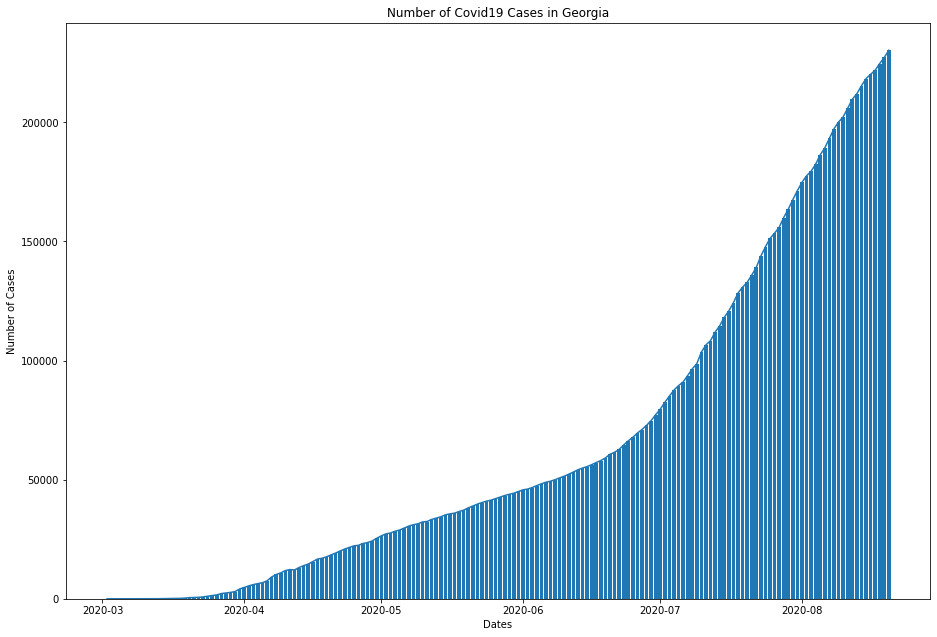

In [7]:
CovidCases("Georgia")

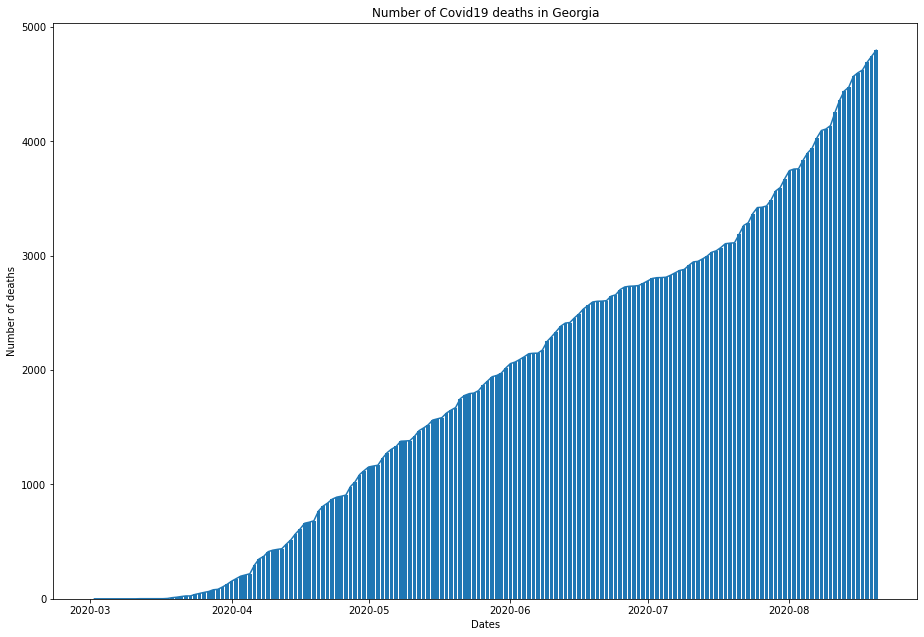

In [8]:
CovidDeaths("Georgia")

Use New York Times' COVID-19 data(https://github.com/nytimes/covid-19-data/blob/master/us-states.csv) to create a choropleth map of the United States based on its numbers of COVID-19 cases and deaths. (Use colors that you think are appropriate).

In [9]:
#Dataframe Formatter = makes each date a column
def dfFormatter(df, selectColumn):
    #Separate df_formatted from df. Create list of states and their latitudes and longitudes.
    df_formatted = pd.DataFrame(statesList, columns = ['state'])
    df_formatted['lat'] = latitudes
    df_formatted['long'] = longitudes
    
    #Create columns for each date, start off by zeroing out everything.
    #previousDate = datetime.datetime(2020, 1, 1) #Commented out because datetime is no longer a type.
    previousDate = "2020-01-01"
    for i in range(len(df['date'])): #iterates through each date in date column
        if df['date'][i] != previousDate: #if this date doesn't = previous date, the item = 0
            df_formatted[df['date'][i]] = 0

    #Set index to states temporarily.
    df_formatted.set_index('state', inplace=True) #organize by state

    
    #Select which data you want to use based on the column that you are plotting (cases or deaths)
    if selectColumn == 'cases':
        #Get number of cases from df and put them in df_formatted.  
        for i in range(len(df['state'])):
            df_formatted.loc[df['state'][i], df['date'][i]] = df['cases'][i]
            #Format for .loc : df_formatted.loc['index/row label', 'column label'] = 'value'
    elif selectColumn == 'deaths':
        for i in range(len(df['state'])):
            df_formatted.loc[df['state'][i], df['date'][i]] = df['deaths'][i]
            #Format for .loc : df_formatted.loc['index/row label', 'column label'] = 'value'

    
    #Reset index when done so that state becomes a column without being the index.
    df_formatted.reset_index(inplace=True)
    
    #Drop last 5 rows because we are focusing on the 50 states.
    df_formatted.drop([50,51,52,53,54], inplace=True)
        
    return df_formatted

In [15]:
#Call the function and assign what it returns to the dataframe variables you will be using.
AmountCases = dfFormatter(df, "cases")
AmountCases.head()

,state,lat,long,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,2020-02-09 00:00:00,2020-02-10 00:00:00,2020-02-11 00:00:00,2020-02-12 00:00:00,2020-02-13 00:00:00,2020-02-14 00:00:00,2020-02-15 00:00:00,2020-02-16 00:00:00,2020-02-17 00:00:00,2020-02-18 00:00:00,2020-02-19 00:00:00,2020-02-20 00:00:00,2020-02-21 00:00:00,2020-02-22 00:00:00,2020-02-23 00:00:00,2020-02-24 00:00:00,2020-02-25 00:00:00,2020-02-26 00:00:00,...,2020-07-12 00:00:00,2020-07-13 00:00:00,2020-07-14 00:00:00,2020-07-15 00:00:00,2020-07-16 00:00:00,2020-07-17 00:00:00,2020-07-18 00:00:00,2020-07-19 00:00:00,2020-07-20 00:00:00,2020-07-21 00:00:00,2020-07-22 00:00:00,2020-07-23 00:00:00,2020-07-24 00:00:00,2020-07-25 00:00:00,2020-07-26 00:00:00,2020-07-27 00:00:00,2020-07-28 00:00:00,2020-07-29 00:00:00,2020-07-30 00:00:00,2020-07-31 00:00:00,2020-08-01 00:00:00,2020-08-02 00:00:00,2020-08-03 00:00:00,2020-08-04 00:00:00,2020-08-05 00:00:00,2020-08-06 00:00:00,2020-08-07 00:00:00,2020-08-08 00:00:00,2020-08-09 00:00:00,2020-08-10 00:00:00,2020-08-11 00:00:00,2020-08-12 00:00:00,2020-08-13 00:00:00,2020-08-14 00:00:00,2020-08-15 00:00:00,2020-08-16 00:00:00,2020-08-17 00:00:00,2020-08-18 00:00:00,2020-08-19 00:00:00,2020-08-20 00:00:00
0,Alabama,32.361538,-86.279118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,53587.0,55545.0,57255.0,59067.0,61088.0,63091.0,65234.0,67011.0,68891.0,70358.0,71813.0,74212.0,76005.0,78130.0,79294.0,81115.0,82366.0,83782.0,85762.0,87723.0,89349.0,91444.0,92661.0,93702.0,94654.0,96592.0,98301.0,100173.0,101334.0,103020.0,103851.0,104786.0,105557.0,106309.0,107580.0,108433.0,109004.0,110361.0,111478.0,112449.0
1,Alaska,58.301935,-134.419740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1772.0,1843.0,1897.0,1958.0,2034.0,2083.0,2157.0,2275.0,2412.0,2523.0,2617.0,2682.0,2746.0,2866.0,3100.0,3204.0,3348.0,3440.0,3557.0,3675.0,3825.0,3982.0,4062.0,4123.0,4181.0,4221.0,4286.0,4371.0,4471.0,4537.0,4587.0,4653.0,4748.0,4867.0,4952.0,5058.0,5108.0,5175.0,5245.0,5330.0
2,Arizona,33.448457,-112.073844,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,122479.0,123917.0,128126.0,131411.0,134730.0,138575.0,141333.0,143644.0,145320.0,148730.0,150659.0,153029.0,156392.0,160055.0,162041.0,163918.0,165994.0,168361.0,170905.0,174108.0,177019.0,178473.0,179506.0,180537.0,182230.0,183744.0,185104.0,186226.0,187086.0,187634.0,188780.0,189522.0,190850.0,191810.0,192670.0,193554.0,194027.0,194931.0,195568.0,196305.0
3,Arkansas,34.736009,-92.331122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28367.0,28939.0,29733.0,30297.0,31114.0,31762.0,32533.0,33228.0,33927.0,34655.0,35246.0,36259.0,37249.0,37981.0,38623.0,39447.0,40181.0,40968.0,41759.0,42511.0,43173.0,43810.0,44597.0,45381.0,46293.0,47028.0,48039.0,48811.0,49383.0,50028.0,50411.0,51114.0,51766.0,52392.0,51992.0,52665.0,53077.0,53487.0,54216.0,54765.0
4,California,38.555605,-121.468926,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,8.0,9.0,9.0,9.0,11.0,11.0,26.0,...,327676.0,336206.0,346593.0,355497.0,364761.0,374922.0,383194.0,391460.0,400195.0,410366.0,422528.0,433175.0,443096.0,453327.0,459338.0,467103.0,474951.0,486039.0,494269.0,502273.0,509507.0,515937.0,522235.0,527258.0,532776.

In [11]:
deathsS = dfFormatter(df, "deaths")
deathsS.head()

,state,lat,long,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,2020-02-09 00:00:00,2020-02-10 00:00:00,2020-02-11 00:00:00,2020-02-12 00:00:00,2020-02-13 00:00:00,2020-02-14 00:00:00,2020-02-15 00:00:00,2020-02-16 00:00:00,2020-02-17 00:00:00,2020-02-18 00:00:00,2020-02-19 00:00:00,2020-02-20 00:00:00,2020-02-21 00:00:00,2020-02-22 00:00:00,2020-02-23 00:00:00,2020-02-24 00:00:00,2020-02-25 00:00:00,2020-02-26 00:00:00,...,2020-07-12 00:00:00,2020-07-13 00:00:00,2020-07-14 00:00:00,2020-07-15 00:00:00,2020-07-16 00:00:00,2020-07-17 00:00:00,2020-07-18 00:00:00,2020-07-19 00:00:00,2020-07-20 00:00:00,2020-07-21 00:00:00,2020-07-22 00:00:00,2020-07-23 00:00:00,2020-07-24 00:00:00,2020-07-25 00:00:00,2020-07-26 00:00:00,2020-07-27 00:00:00,2020-07-28 00:00:00,2020-07-29 00:00:00,2020-07-30 00:00:00,2020-07-31 00:00:00,2020-08-01 00:00:00,2020-08-02 00:00:00,2020-08-03 00:00:00,2020-08-04 00:00:00,2020-08-05 00:00:00,2020-08-06 00:00:00,2020-08-07 00:00:00,2020-08-08 00:00:00,2020-08-09 00:00:00,2020-08-10 00:00:00,2020-08-11 00:00:00,2020-08-12 00:00:00,2020-08-13 00:00:00,2020-08-14 00:00:00,2020-08-15 00:00:00,2020-08-16 00:00:00,2020-08-17 00:00:00,2020-08-18 00:00:00,2020-08-19 00:00:00,2020-08-20 00:00:00
0,Alabama,32.361538,-86.279118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1121.0,1124.0,1164.0,1211.0,1230.0,1265.0,1286.0,1287.0,1291.0,1303.0,1364.0,1397.0,1438.0,1456.0,1473.0,1491.0,1491.0,1538.0,1565.0,1580.0,1603.0,1627.0,1633.0,1666.0,1695.0,1714.0,1735.0,1755.0,1768.0,1797.0,1847.0,1882.0,1890.0,1893.0,1896.0,1898.0,1925.0,1936.0,1944.0,1974.0
1,Alaska,58.301935,-134.419740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,15.0,15.0,15.0,16.0,16.0,16.0,16.0,17.0,17.0,17.0,18.0,18.0,19.0,20.0,20.0,21.0,21.0,22.0,22.0,23.0,23.0,23.0,23.0,23.0,24.0,24.0,24.0,24.0,25.0,25.0,25.0,26.0,26.0,26.0,27.0,27.0,27.0
2,Arizona,33.448457,-112.073844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2239.0,2250.0,2341.0,2442.0,2506.0,2597.0,2733.0,2768.0,2795.0,2918.0,2976.0,3067.0,3156.0,3288.0,3313.0,3320.0,3424.0,3470.0,3628.0,3695.0,3753.0,3769.0,3785.0,3850.0,3933.0,4005.0,4085.0,4140.0,4152.0,4157.0,4205.0,4348.0,4385.0,4426.0,4497.0,4509.0,4509.0,4535.0,4643.0,4688.0
3,Arkansas,34.736009,-92.331122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,321.0,323.0,331.0,335.0,341.0,353.0,357.0,357.0,363.0,374.0,380.0,386.0,394.0,399.0,401.0,408.0,428.0,434.0,442.0,453.0,458.0,464.0,475.0,490.0,508.0,515.0,521.0,535.0,544.0,555.0,566.0,573.0,582.0,587.0,600.0,599.0,603.0,619.0,631.0,641.0
4,California,38.555605,-121.468926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7042.0,7086.0,7227.0,7368.0,7490.0,7607.0,7697.0,7710.0,7764.0,7883.0,8038.0,8190.0,8325.0,8428.0,8451.0,8544.0,8716.0,8884.0,9009.0,9222.0,9365.0,9399.0,9500.0,9696.0,9866.0,10014.0,10197.0,10299.0,10365.0,10460.0,10654.0,10808.0,10995.0,11146.0,11229.0,11245.0,11334.0,11523.0,11686.0,11801.0


# Choropleth Maps

In [ ]:
colors = ["#FFFFFF", "#FFEBEB", "#FFC1C1", "#FF9B9B", "#FF7777", "#FF4A4A", "#FF0000", "#EA0909", "#BB0606", "#931414", "#7E0909"]

In [36]:
def d_c(date, dc): #dc = deaths or cases
  df_dc = dfFormatter(df, dc)
  colors = ["#FFFFFF", "#FFEBEB", "#FFC1C1", "#FF9B9B", "#FF7777", "#FF4A4A", "#FF0000", "#EA0909", "#BB0606", "#931414", "#7E0909"]
  fig = go.Figure(data = go.Choropleth(
   locationmode = "USA-states", 
   locations = stateAbbreviationList,
   z = df_dc[date], #z repsents the color assignments,  the location, and what data you are accessing
   colorscale = colors,
   reversescale = False,
   autocolorscale = False #gives default patterns
#array = list 
  ))
  fig.update_layout(
     title_text = "Number of COVID-19 " + dc + " in USA",
     geo = dict(showcoastlines = True, scope = "usa"))
  fig.show()

In [43]:
d_c("2020-08-20", "cases")

## 2 - Analyzing Its Impact on the United States

Group 5 -

The cancellation of public events and gatherings have impacted the world's work-life balance in ways never seen before. Using the following dataset from Oxford University(https://github.com/OxCGRT/covid-policy-tracker/blob/master/data/timeseries/c4_restrictionsongatherings.csv), create a choropleth map of the # of gathering restrictions imposed in each country.

## 3 - Challenge (optional): Find a dataset online that explores other ways that COVID-19 has impacted the United States and use pandas and Plotly to create a visualization based on it.

Some ideas:
* number of business closures in each state over time
* number of people telecommuting in the US
* number of hospitalizations in each state

etc..